#### Monte-Carlo simulation of the aquarium problem

Simulate the aquarium problem `nsamples` times over 10 weeks of sales.

In [71]:
import numpy as np
import random as rdm


# Create a Poisson distribution using the discrete event method

Lambda=1
nweeks = 10

nsamples = 100000

time = np.linspace(0,nweeks,nweeks+1)[0:nweeks];

Dn = np.zeros([nsamples, nweeks])   # number of customers for each random sample and each week
Xn = np.zeros([nsamples, nweeks])   # number of aquariums in stock for each random sample and each week

for sample in range (nsamples):
    X=3
    Xn[sample,0] = X
    # Dn[sample,0] = np.random.poisson(Lambda)
    
    for n in range(0,nweeks-1):
               
        Dn[sample,n] = np.random.poisson(Lambda)  # random number of customers this week (with Poisson distribution)
        
        X -= Dn[sample,n]
        
        if (X<=0): X = 3
        Xn[sample,n+1] = X
        

[1. 1. 0. 1. 1. 2. 1. 1. 2. 0.]


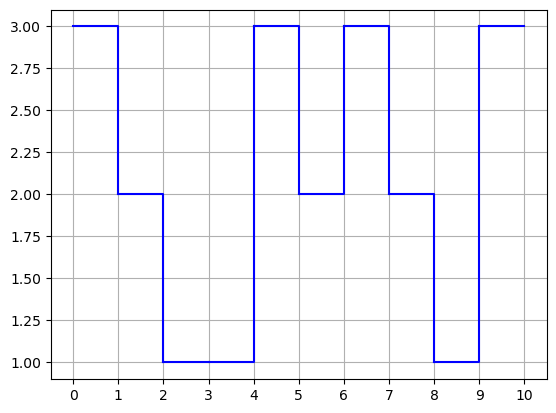

In [72]:
import matplotlib.pyplot as plt;

# Plot one of the sample inventories

sample = 8

for i in range(nweeks-1):
    x = [time[i],      time[i+1],   time[i+1]]
    y = [Xn[sample,i], Xn[sample,i], Xn[sample,i+1]]

    plt.plot(x,y,'b');
plt.plot([nweeks-1, nweeks],[Xn[sample,i+1],Xn[sample,i+1]],'b');
plt.xticks(np.arange(0, 11, step=1))
plt.grid()

print(Dn[sample,:])

# plt.savefig('aquarium-sim-og.png');

#### Monte-Carlo simulation of the (modified) aquarium problem

Simulate the aquarium problem `nsamples` times over 10 weeks of sales.

In this modified simulation, when the inventory is 1, we flip a fair coin to decide whether to order new aquariums or not.

In [73]:
import numpy as np
import random as rdm


# Create a Poisson distribution using the discrete event method

# Lambda=1
# nweeks = 10

# nsamples = 100000

# time = np.linspace(0,nweeks,nweeks);

# Dn = np.zeros([nsamples, nweeks])
Xnm = np.zeros([nsamples, nweeks])

for sample in range (nsamples):
    X=3
    Xnm[sample,0] = X
    # Dn[sample,0] = np.random.poisson(Lambda)
    
    for n in range(0,nweeks-1):
        # Dn[sample,n] = np.random.poisson(Lambda)
        X -= int(Dn[sample,n])
        
        if ((X==1) and (np.random.randint(2)==1)) or (X<=0): 
            X=3
        Xnm[sample,n+1] = X
        

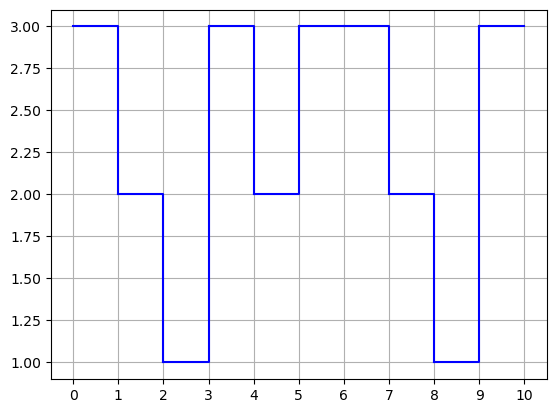

In [74]:
import matplotlib.pyplot as plt;

# Plot one of the sample inventories

sample = 8

for i in range(nweeks-1):
    x = [time[i],      time[i+1],   time[i+1]]
    y = [Xnm[sample,i], Xnm[sample,i], Xnm[sample,i+1]]

    plt.plot(x,y,'b');
plt.plot([nweeks-1, nweeks],[Xnm[sample,i+1],Xnm[sample,i+1]],'b');
plt.xticks(np.arange(0, 11, step=1))
plt.grid()

# plt.savefig('aquarium-sim-mod.png');

#### Plotting the combined results


In [75]:
import matplotlib.pyplot as plt;

# Based on the simulations, create a probability graph.


Inventory = np.zeros([nweeks,3])
    # probability of inventory in each state

Inventorym = np.zeros([nweeks,3])
    # probability of inventory in each state


LostSales = np.zeros([nweeks, 2])  
LostSalesm = np.zeros([nweeks, 2])  
    # 0 -> probability of losing a sale
    # 1 -> expected number of lost sales



for sample in range (nsamples):    
    for n in range(nweeks):
        Inventory[n,int(Xn[sample,n]-1)] += 1
        Inventorym[n,int(Xnm[sample,n]-1)] += 1

        if (Xn[sample,n] < Dn[sample,n]): 
            LostSales[n,0] += 1
            LostSales[n,1] += int(Dn[sample,n]) - int(Xn[sample,n])

        if (Xnm[sample,n] < Dn[sample,n]): 
            LostSalesm[n,0] += 1
            LostSalesm[n,1] += int(Dn[sample,n]) - int(Xnm[sample,n])

Inventory = Inventory/nsamples;
LostSales = LostSales/nsamples;

Inventorym = Inventorym/nsamples;
LostSalesm = LostSalesm/nsamples;

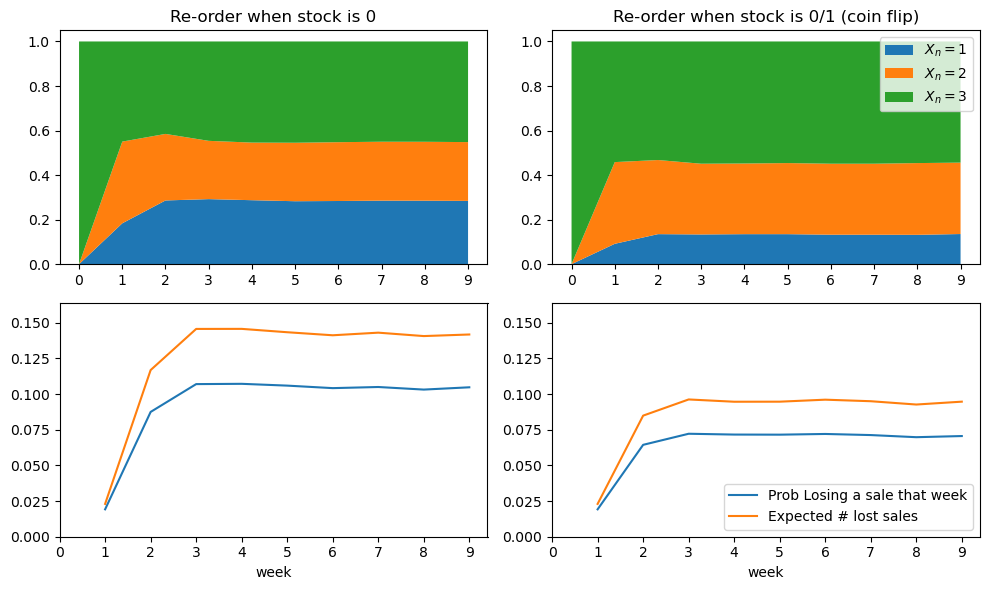

In [80]:
import matplotlib.pyplot as plt;

# Plot the Poisson distribution obtained

time = np.linspace(0,nweeks,nweeks+1)[0:nweeks]

M=np.max(LostSales[:,1])*9/8;     # Setting up the maximum y-value on the graph, to show the data nicely


figure,axis = plt.subplots(2,2);
figure.set_size_inches(10, 6)

axis[0,0].stackplot(time, Inventory[:,0], Inventory[:,1], Inventory[:,2]);
axis[0,0].set_xticks(np.arange(0,nweeks,step=1));
axis[0,0].set_title('Re-order when stock is 0');
# axis[0,0].legend(['$X_n=1$', '$X_n=2$','$X_n=3$']);

axis[1,0].plot(time[1:], LostSales[:nweeks-1,0], time[1:], LostSales[:nweeks-1,1]);
axis[1,0].set_xticks(np.arange(0,nweeks,step=1));
# axis[1,0].legend(['Prob Losing a sale that week','Expected # lost sales'],loc=4);
axis[1,0].set_ylim([0,M]);
axis[1,0].set_xlabel('week');

axis[0,1].stackplot(time, Inventorym[:,0], Inventorym[:,1], Inventorym[:,2]);
axis[0,1].set_xticks(np.arange(0,nweeks,step=1));
axis[0,1].set_title('Re-order when stock is 0/1 (coin flip)');
axis[0,1].legend(['$X_n=1$', '$X_n=2$','$X_n=3$']);

axis[1,1].plot(time[1:], LostSalesm[:nweeks-1,0], time[1:], LostSalesm[:nweeks-1,1]);
axis[1,1].set_xticks(np.arange(0,nweeks,step=1));
axis[1,1].legend(['Prob Losing a sale that week','Expected # lost sales'],loc=4);
axis[1,1].set_ylim([0,M]);
axis[1,1].set_xlabel('week');


figure.tight_layout();
# figure.savefig('aquarium-sim.png');

The graphs above show the following:
* Left: Re-stock when inventory reaches $X_n=0$
* Right: When inventory reaches $X_n=1$, flip a fair coin to decide whether or not to re-stock
* Above: Probability of each stock state per week
* Below: Probability of losing a sale that week (blue) and Expected number of lost sales that week (orange)